In [11]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np
import pandas as pd
import keras
import sklearn
from sklearn import linear_model, decomposition, manifold, cluster
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

Prepare data for transform

In [21]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
np.random.shuffle(X_train)
X_train = X_train[:1000].reshape((1000, 784))

model = sklearn.decomposition.PCA()
model.fit(X_train, y_train)
X_train_pca = model.transform(X_train)

Extract vector components and reconstruct some images

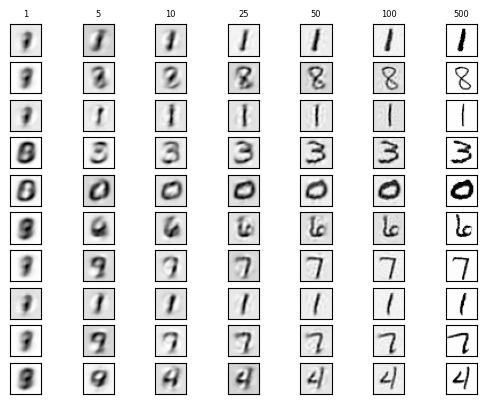

In [18]:
components = [1, 5, 10, 25, 50, 100, 500]

# components = [1, 2, 3, 4, 5, 6, 100]
rows = 10
res = []
for r in range(rows):
    for c in components:
        res.append([r, c])

fig, axes = plt.subplots(rows, len(components))

for i, ((pic, cmp), ax) in enumerate(zip(res, axes.flatten())):
    X_train_pca = model.transform(X_train)
    X_train_pca[:, cmp:] = 0.0
    X_train_transformed = model.inverse_transform(X_train_pca)
    ax.imshow(X_train_transformed[pic].reshape((28, 28)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i <= 6:
        ax.set_title(cmp, fontdict={'fontsize': 6})

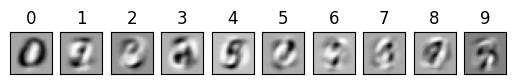

In [4]:
fig, axes = plt.subplots(1, 10)
for i, ax in enumerate(axes):
    ax.imshow(model.components_[i].reshape((28, 28)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(i)

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
np.random.shuffle(X_train)
X_train = X_train[:2000].reshape((2000, 784))

model = sklearn.decomposition.NMF()
model.fit(X_train, y_train)
X_train_pca = model.transform(X_train)

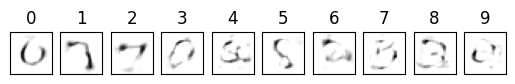

In [6]:
fig, axes = plt.subplots(1, 10)
for i, ax in enumerate(axes):
    ax.imshow(model.components_[i+10].reshape((28, 28)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(i)

/media/danz/data/dev/ml/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


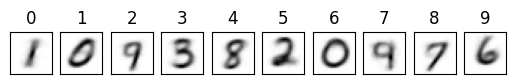

In [22]:
model = sklearn.cluster.KMeans(10)
model.fit(X_train, y_train)

fig, axes = plt.subplots(1, 10)
for i, ax in enumerate(axes):
    ax.imshow(model.cluster_centers_[i, :].reshape((28, 28)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(i)